In [27]:
%matplotlib inline

In [28]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

from config import nrel_key

In [29]:
fuel = "ELEC"
file_format = "csv"
access = "public"
#country = "US"

params = {
    "api_key": nrel_key,
    "fuel_type": fuel,
    "access": access
    }

base_url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.json?{params}"

print(base_url)
response = requests.get(base_url, params=params).json()
#print(json.dumps(response,indent=4, sort_keys=True))

df = pd.DataFrame(response["fuel_stations"])
df

https://developer.nrel.gov/api/alt-fuel-stations/v1.json?{'api_key': 'o2awjV3tGxSyNHaXmOMCcfspdnQeq7yDU17q9BQt', 'fuel_type': 'ELEC', 'access': 'public'}


,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
0,public,5:30am-9pm; pay lot,None,None,2023-01-10,None,ELEC,Public,1523,1995-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
1,public,24 hours daily,None,None,2022-09-14,None,ELEC,Public,1583,1996-10-15,...,None,None,None,None,None,None,Public,None,NaN,NaN
2,public,24 hours daily,None,None,2023-01-10,None,ELEC,Public,6355,1997-07-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
3,public,Dealership business hours,CALL,None,2021-12-09,None,ELEC,Public - Call ahead,6405,2012-12-11,...,None,None,None,None,None,None,Public - Appeler à l'avance,None,NaN,NaN
4,public,6am-12am daily,None,None,2020-02-06,None,ELEC,Public,6425,1997-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54867,public,24 hours daily,None,A ACCOUNT_BALANCE D M V,2023-02-15,None,ELEC,Public,254009,2022-12-22,...,None,None,None,None,None,None,Public,None,"{'station': ['US-RIV-L1997489038'], 'posts': [...",NaN
54868,public,24 hours daily,None,A ACCOUNT_BALANCE D M V,2023-02-15,None,ELEC,Public,254010,2022-12-22,...,None,None,None,None,None,None,Public,None,"{'station': ['US-RIV-L1576289752'], 'posts': [...",NaN
54869,public,None,None,None,2023-02-15,None,ELEC,Public,254011,2023-02-15,...,None,None,None,None,None,None,Public,None,{'station': ['732982fb-d9cf-48be-b613-d1f96cc7...,NaN
54870,public,None,None,None,2023-02-15,None,ELEC,Public,254012,2023-02-15,...,None,None,None,None,None,None,Public,None,{'station': ['2d571129-f3cb-4e6d-8b50-7d22ec07...,NaN


In [30]:
df_cleaned = df[["access_code","state",'zip','id']]

df_cleaned.head()

,access_code,state,zip,id
0,public,CA,90015,1523
1,public,CA,91731,1583
2,public,CA,92037,6355
3,public,CA,91343,6405
4,public,CA,92503,6425


In [31]:
state_df = df_cleaned.groupby(['state']).count()['id']

print(state_df)

state
AK       60
AL      269
AR      227
AZ      988
CA    15132
CO     1830
CT      569
DC      289
DE      154
FL     2952
GA     1688
HI      370
IA      312
ID      119
IL     1292
IN      398
KA        1
KS      477
KY      241
LA      193
MA     2521
MD     1384
ME      415
MI     1160
MN      602
MO     1088
MS      101
MT      101
NC     1164
ND       82
NE      220
NH      184
NJ      962
NM      242
NV      529
NY     3573
OH     1253
OK      323
ON        8
OR     1015
PA     1355
PR       33
QC        2
RI      313
SC      435
SD       75
TN      671
TX     2617
UT      799
VA     1231
VT      358
WA     1799
WI      485
WV      124
WY       85
Name: id, dtype: int64


In [32]:
ev_registration_path = "resources/ev_registration_by_state.csv"

registration_data = pd.read_csv(ev_registration_path)

registration_data.sort_values(by = "Registration Count", ascending=False)

state_pop_path = "resources/2022_est_state_pop.csv"

population_data = pd.read_csv(state_pop_path)

In [33]:
df_complete = pd.merge(state_df, registration_data, how = "left", on=["state"])

df_complete.rename(columns = {"id":"Number of EV Chargers"},inplace=True)

df_complete["Number of EV Chargers"].astype(float)

df_complete.dropna(inplace=True)

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   Number of EV Chargers  51 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [34]:
df_complete['Registration Count'] = pd.to_numeric(df_complete['Registration Count'])

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   Number of EV Chargers  51 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [35]:
chargers_per_1000_merge = pd.merge(population_data, df_complete, how = "left", on=["state"])

chargers_per_1000_merge.head()

chargers_per_1000_merge["EVs per 1000"] = (chargers_per_1000_merge["Registration Count"] / chargers_per_1000_merge["Population (est.)"]) * 1000

chargers_per_1000_merge.head()

,Geographic Area,state,Population (est.),Number of EV Chargers,State Name,Registration Count,EVs per 1000
0,Alabama,AL,5074296,269,Alabama,4750.0,0.936090
1,Alaska,AK,733583,60,Alaska,1290.0,1.758492
2,Arizona,AZ,7359197,988,Arizona,40740.0,5.535930
3,Arkansas,AR,3045637,227,Arkansas,2390.0,0.784729
4,California,CA,39029342,15132,California,563070.0,14.426838


In [36]:
columns_to_check = ["EVs per 1000","Number of EV Chargers"]

for x in columns_to_check:
    expected = chargers_per_1000_merge[x]
    quartiles = expected.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x} values below {lower_bound} could be outliers.")
    print(f"{x} values above {upper_bound} could be outliers.")

EVs per 1000 values below -2.610727257988005 could be outliers.
EVs per 1000 values above 8.332033509674387 could be outliers.
Number of EV Chargers values below -1211.25 could be outliers.
Number of EV Chargers values above 2642.75 could be outliers.


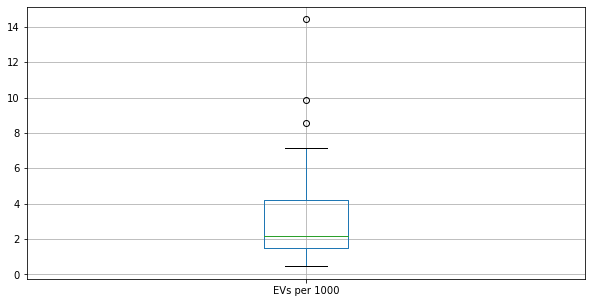

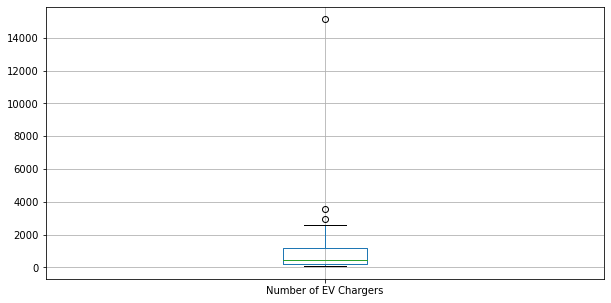

In [37]:
for x in columns_to_check:
    chargers_per_1000_merge.boxplot(x,figsize=(10, 5))
    plt.show()

In [38]:
chargers_per_1000_merge.sort_values(by = "EVs per 1000", ascending=False)
chargers_per_1000_merge.head()

,Geographic Area,state,Population (est.),Number of EV Chargers,State Name,Registration Count,EVs per 1000
0,Alabama,AL,5074296,269,Alabama,4750.0,0.936090
1,Alaska,AK,733583,60,Alaska,1290.0,1.758492
2,Arizona,AZ,7359197,988,Arizona,40740.0,5.535930
3,Arkansas,AR,3045637,227,Arkansas,2390.0,0.784729
4,California,CA,39029342,15132,California,563070.0,14.426838


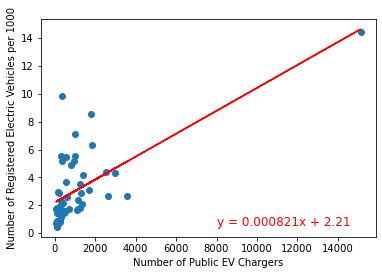

The r-squared is: 0.4451917895525131


In [52]:
x_values = chargers_per_1000_merge['Number of EV Chargers']
y_values = chargers_per_1000_merge['EVs per 1000']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Number of Registered Electric Vehicles per 1000')
plt.xlabel('Number of Public EV Chargers')
plt.annotate(line_eq,(8000,0.5),fontsize=12,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [40]:
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.67


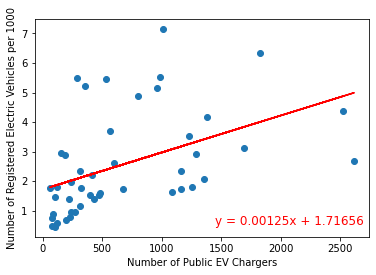

The r-squared is: 0.20795057464343988


In [46]:
ca_removed = chargers_per_1000_merge.loc[((chargers_per_1000_merge["EVs per 1000"] < 8.332033509674387) & (chargers_per_1000_merge["Number of EV Chargers"] < 2642.75))]

x_values = ca_removed['Number of EV Chargers']
y_values = ca_removed['EVs per 1000']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1450,0.5),fontsize=12,color="red",)
plt.xlabel('Number of Public EV Chargers')
plt.ylabel('Number of Registered Electric Vehicles per 1000')
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [ ]:
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.46
